In [43]:
import numpy as np
from scipy.integrate import solve_ivp
from SALib.sample import saltelli, sobol, fast_sampler
from SALib.analyze import sobol, fast
import seaborn as sns
import SALib
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
from scipy.constants import N_A

In [44]:
Target_cell_number = 2e5
well_size = 150e-6
r_ab = 1.25e-6 # in cm
t_end = 60*60*10
t = np.geomspace(1e-10, t_end, 20)
tspan = [1e-10, t_end]
z0 = [0, 0, 0]
z01 = [0, 0]
T_cell_radius = 5e-4 #cm
T_cell_surface_area = 4*math.pi*((T_cell_radius)**2)
reaction_volume = (2/3)*math.pi*((r_ab)**3)
tumour_cell_radius = 8e-6
tumour_cell_surface_area = 4*math.pi*((tumour_cell_radius)**2)

In [45]:
sigma = well_size*N_A/Target_cell_number

def A1_steady_state(x, Ainit, k1, koff, k2, rtot, dummy):
    k1 = k1/sigma
    Atot = sigma*Ainit
    express = 2*k1*(rtot - x - 2*(k2*x*(rtot-x)/(2*(koff + k2*x))))*(Atot - x - (k2*x*(rtot-x)/(2*(koff + k2*x)))) -koff*x - k2*x*(rtot - x - 2*(k2*x*(rtot-x)/(2*(koff + k2*x)))) +2*koff*(k2*x*(rtot-x)/(2*(koff + k2*x)))

    return express

def A2_steady_state(x, k2, koff, rtot, dummy):
    express = k2*x*(rtot-x)/(2*(koff + k2*x))

    return express



In [46]:

problem1 = {
    'num_vars': 5,
    'names': ['rtot', 'kon', 'D', 'koff', 'dummy'],
    'bounds': [[4, 6],
               [4, 6],
               [-15, -13],
               [-6, -4],
               [1, 1000]]
}

problem2 = {
    'num_vars': 4,
    'names': ['kon', 'k2', 'koff', 'dummy'],
    'bounds': [[1e3, 1e7],
               [1e4, 1e6],
               [1e-6, 1e-1],
               [1, 1000]]
}


vals = SALib.sample.sobol.sample(problem1, 65536)
Y_ag1 = np.zeros(len(vals))
Y_ag2 = np.zeros(len(vals))
Y_ab = np.zeros(len(vals))
indicies_ag1 = []
indicies_ag2 = []
indicies_ab = []
A0s = [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
Y = np.zeros(len(vals))
indicies = []
indicies_1 = []

In [47]:
65536

65536

In [48]:
sol_holder = []
for Ainit in A0s:
    print(Ainit)
    for i, params in enumerate(vals):
     
        rtot = params[0]
        rtot  = 10**rtot
        kon = params[1]
        kon = 10**kon
        D = params[2]
        D = 10**D
        koff = params[3]
        koff = 10**koff
        dummy = params[4]

        k2 = 4*D/tumour_cell_surface_area

        guess = 0

        A1_st = fsolve(A1_steady_state, [guess], args=(Ainit, kon, koff, k2, rtot, dummy))
        A2_st = A2_steady_state(A1_st, k2, koff, rtot, dummy)
        if (A1_st < 0) or (A2_st < 0) :
            print('negative')
        
        if ((A1_st + 2*A2_st) > rtot):
            print('blown up')
        Ag =(A1_st + A2_st)
        Y[i] = Ag
    
    Si = sobol.analyze(problem1, Y, print_to_console=True)
    indicies.append(Si['ST'])
    indicies_1.append(Si['S1'])


1e-11
             ST   ST_conf
rtot   0.857863  0.081371
kon    0.341974  0.031806
D      0.338867  0.033285
koff   0.644986  0.060207
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.135619  0.032601
kon    0.013056  0.006663
D      0.009941  0.005204
koff   0.041787  0.013497
dummy  0.000000  0.000000
                     S2   S2_conf
(rtot, kon)    0.074817  0.061215
(rtot, D)      0.062391  0.050702
(rtot, koff)   0.233735  0.068787
(rtot, dummy) -0.003318  0.045183
(kon, D)       0.012898  0.018232
(kon, koff)    0.023169  0.018675
(kon, dummy)   0.006005  0.015329
(D, koff)      0.030433  0.019146
(D, dummy)     0.004083  0.011710
(koff, dummy) -0.004578  0.019016
1e-10
             ST   ST_conf
rtot   0.999910  0.008507
kon    0.000104  0.000007
D      0.000079  0.000007
koff   0.000182  0.000011
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.999769  0.009489
kon    0.000036  0.000111
D      0.000017  0.000103
koff   0.000040  0.000135
dummy  0.000000 

/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


             ST       ST_conf
rtot   0.999985  8.005011e-03
kon    0.000013  4.505232e-07
D      0.000009  2.767354e-07
koff   0.000004  3.583445e-07
dummy  0.000000  0.000000e+00
                 S1   S1_conf
rtot   9.999778e-01  0.012478
kon    2.414590e-06  0.000039
D      6.253788e-07  0.000033
koff  -1.873234e-06  0.000020
dummy  0.000000e+00  0.000000
                     S2   S2_conf
(rtot, kon)   -0.000005  0.021687
(rtot, D)     -0.000008  0.021681
(rtot, koff)  -0.000006  0.021693
(rtot, dummy) -0.000011  0.021687
(kon, D)       0.000009  0.000061
(kon, koff)    0.000006  0.000061
(kon, dummy)   0.000006  0.000061
(D, koff)      0.000004  0.000048
(D, dummy)     0.000004  0.000048
(koff, dummy) -0.000006  0.000035
1e-08


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


                 ST       ST_conf
rtot   9.998077e-01  8.099155e-03
kon    1.625051e-04  4.813549e-06
D      1.575075e-04  4.948661e-06
koff   1.039404e-07  5.017222e-09
dummy  0.000000e+00  0.000000e+00
                 S1   S1_conf
rtot   9.997262e-01  0.011711
kon    8.210347e-05  0.000122
D      7.904837e-05  0.000127
koff   4.600979e-08  0.000003
dummy  0.000000e+00  0.000000
                         S2   S2_conf
(rtot, kon)    3.346578e-05  0.014254
(rtot, D)      3.207170e-05  0.014254
(rtot, koff)  -1.096914e-06  0.014238
(rtot, dummy) -1.249255e-06  0.014239
(kon, D)       3.216886e-05  0.000190
(kon, koff)    7.563303e-07  0.000188
(kon, dummy)   7.580579e-07  0.000188
(D, koff)      1.242079e-07  0.000183
(D, dummy)     1.244183e-07  0.000183
(koff, dummy)  6.679924e-07  0.000005
1e-07


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


                 ST       ST_conf
rtot   9.984245e-01  8.541829e-03
kon    1.387270e-03  4.348011e-05
D      1.382688e-03  4.359177e-05
koff   9.451446e-09  5.491517e-10
dummy  0.000000e+00  0.000000e+00
                 S1   S1_conf
rtot   9.975938e-01  0.012124
kon    6.772398e-04  0.000387
D      6.755395e-04  0.000409
koff   1.388035e-08  0.000001
dummy  0.000000e+00  0.000000
                         S2   S2_conf
(rtot, kon)    3.460073e-04  0.018187
(rtot, D)      3.475038e-04  0.018490
(rtot, koff)   5.457553e-07  0.018298
(rtot, dummy)  4.896698e-07  0.018298
(kon, D)       2.249346e-04  0.000674
(kon, koff)    3.031592e-08  0.000659
(kon, dummy)   4.157968e-08  0.000659
(D, koff)     -1.961829e-06  0.000599
(D, dummy)    -1.951312e-06  0.000599
(koff, dummy)  1.971182e-07  0.000002
1e-06


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


                 ST       ST_conf
rtot   9.917160e-01  8.342512e-03
kon    8.058062e-03  2.003250e-04
D      8.053904e-03  1.976067e-04
koff   8.211401e-10  4.445810e-11
dummy  0.000000e+00  0.000000e+00
                 S1       S1_conf
rtot   9.856002e-01  1.246023e-02
kon    3.725475e-03  9.040872e-04
D      3.726491e-03  1.049993e-03
koff   6.607145e-09  3.115263e-07
dummy  0.000000e+00  0.000000e+00
                         S2       S2_conf
(rtot, kon)    2.616229e-03  1.580189e-02
(rtot, D)      2.635427e-03  1.610165e-02
(rtot, koff)   6.406375e-06  1.605170e-02
(rtot, dummy)  6.380640e-06  1.605155e-02
(kon, D)       8.339929e-04  1.595063e-03
(kon, koff)   -1.235010e-06  1.543404e-03
(kon, dummy)  -1.228356e-06  1.543403e-03
(D, koff)     -8.287530e-06  1.694765e-03
(D, dummy)    -8.281139e-06  1.694767e-03
(koff, dummy)  5.909448e-08  4.776891e-07
1e-05


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


                 ST       ST_conf
rtot   9.802923e-01  8.847959e-03
kon    2.202967e-02  4.720898e-04
D      2.202624e-02  5.132170e-04
koff   5.791260e-11  2.809461e-12
dummy  0.000000e+00  0.000000e+00
                 S1       S1_conf
rtot   9.583947e-01  1.241723e-02
kon    9.457833e-03  1.635050e-03
D      9.474883e-03  1.605703e-03
koff   8.574959e-10  7.836709e-08
dummy  0.000000e+00  0.000000e+00
                         S2       S2_conf
(rtot, kon)    1.009810e-02  1.864202e-02
(rtot, D)      1.011025e-02  1.888098e-02
(rtot, koff)   1.725465e-05  1.837014e-02
(rtot, dummy)  1.724642e-05  1.837014e-02
(kon, D)       7.495777e-04  2.687426e-03
(kon, koff)    1.910418e-06  2.620462e-03
(kon, dummy)   1.911169e-06  2.620462e-03
(D, koff)     -1.949557e-05  2.641767e-03
(D, dummy)    -1.949412e-05  2.641768e-03
(koff, dummy)  1.847373e-08  1.065478e-07


7


/var/folders/fj/3c6fc0c93lg7p91tnylb8zj80000gn/T/ipykernel_39452/3880543568.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Dark2')


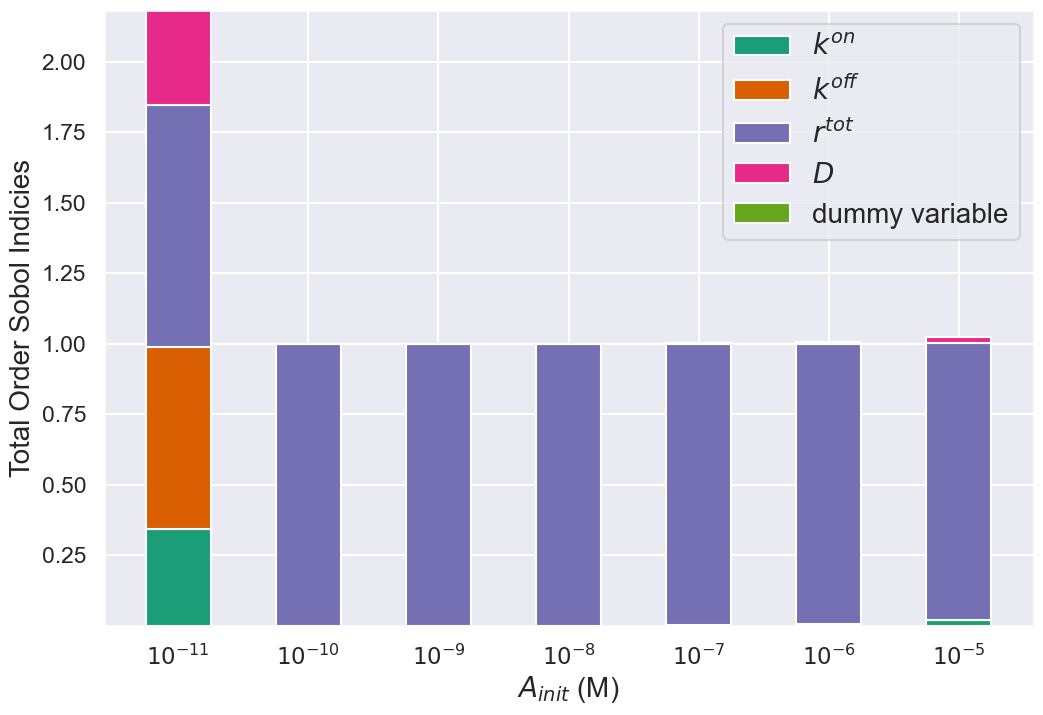

In [51]:

kon_si = np.zeros(len(A0s))
koff_si = np.zeros(len(A0s))
D_si = np.zeros(len(A0s))
rtot_si = np.zeros(len(A0s))
dummy_si = np.zeros(len(A0s))


for i in range(len(indicies)):
    vals = indicies[i]
    rtot_si[i] = vals[0]
    kon_si[i] = vals[1]
    D_si[i] = vals[2]
    koff_si[i] = vals[3]
    dummy_si[i] = vals[4]

print(len(indicies))
ab_conc = ( r'$10^{-11}$', r'$10^{-10}$', r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$')


sns.set_theme()
sns.set_context("talk")

width = 0.5
fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(7)

cm = plt.cm.get_cmap('Dark2')
ax.bar(ab_conc, kon_si, width, label=r'$k^{on}$', bottom= bottom, color=cm(0))
bottom+= kon_si
ax.bar(ab_conc, koff_si, width, label=r'$k^{off}$', bottom= bottom, color=cm(1))
bottom+= koff_si
ax.bar(ab_conc, rtot_si, width, label=r'$r^{tot}$', bottom= bottom, color=cm(2))
bottom+= rtot_si
ax.bar(ab_conc, D_si, width, label=r'$D$', bottom= bottom, color=cm(3))
bottom+= D_si
ax.bar(ab_conc, dummy_si, width, label='dummy variable', bottom=bottom, color=cm(4))
ax.legend(loc='best', fontsize=20)
ax.set_xlabel(r'$A_{init}$' + ' (M)', fontsize=20)
ax.set_ylabel('Total Order Sobol Indicies', fontsize=20)
plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/model_s_bound_ab_total_order_sensiv_analysis.png')

7


Text(0, 0.5, 'Total Order Sobol Indicies')

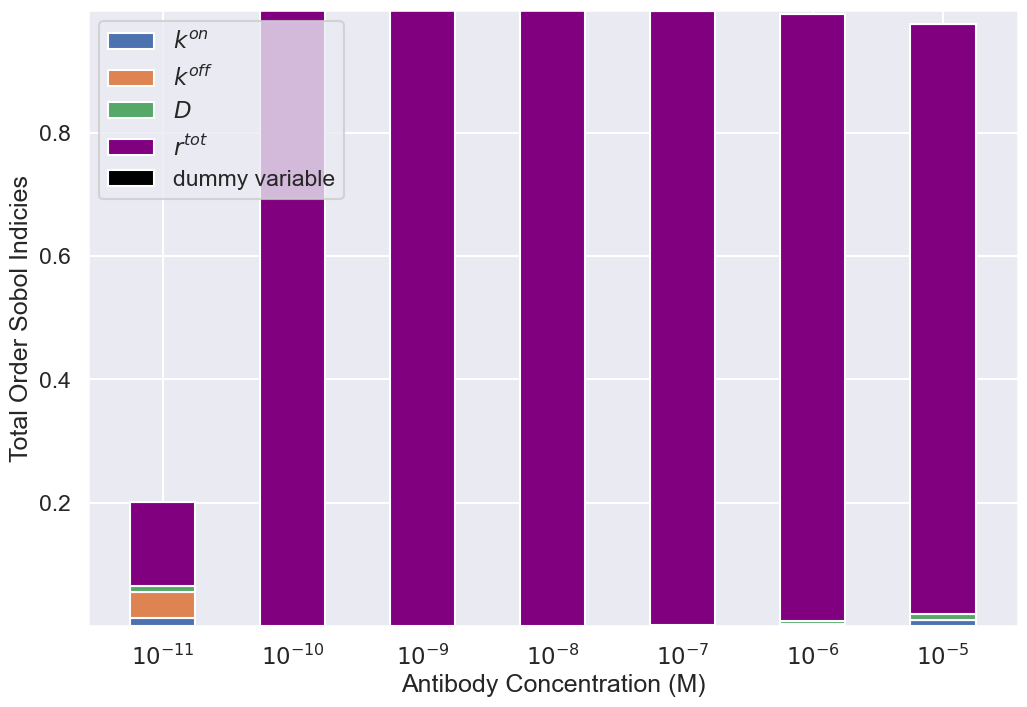

In [50]:
kon_si = np.zeros(len(A0s))
koff_si = np.zeros(len(A0s))
D_si = np.zeros(len(A0s))
rtot_si = np.zeros(len(A0s))
dummy_si = np.zeros(len(A0s))

for i in range(len(indicies_1)):
    vals = indicies_1[i]
    rtot_si[i] = vals[0]
    kon_si[i] = vals[1]
    D_si[i] = vals[2]
    koff_si[i] = vals[3]
    dummy_si[i] = vals[4]

print(len(indicies_1))
ab_conc = ( r'$10^{-11}$', r'$10^{-10}$', r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$')

param_indicies = {
    r"$k^{on}$": kon_si,
    r"$k^{off}$": koff_si,
    r"$D$": D_si,
    
}

sns.set_theme()
sns.set_context("talk")

width = 0.5
fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(7)

for boolean, param_indicie in param_indicies.items():
    p = ax.bar(ab_conc, param_indicie, width, label=boolean, bottom=bottom)
    bottom += param_indicie
ax.bar(ab_conc, rtot_si, width, label=r'$r^{tot}$', bottom= bottom, color='purple')
bottom+= rtot_si
ax.bar(ab_conc, dummy_si, width, label='dummy variable', bottom=bottom, color='black')
ax.legend(loc='best')
ax.set_xlabel('Antibody Concentration (M)')
ax.set_ylabel('Total Order Sobol Indicies')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/model_s_bispecific_total_ab_sensiv_analysis.png')